This model uses Logistic regression algorithm to predict whether the news are fake or not.

First we import the necessary libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the re mibrary that stands for regular expression 
# it is useful for searching the text in a document 
import re

# corpus means the body of that particular text
# nltk stands for natural language  toolkit
from nltk.corpus import stopwords

# This allows to use the stemming function that returns the root of a word (removes prefixes ans suffixes and so on)
from nltk.stem.porter import PorterStemmer

# This is to convert the text into feature (number)
# tf stands for term frequency 
# idf stands for inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer

# This is to split the data into training and testing sets 
from sklearn.model_selection import train_test_split

# We import our mode
from sklearn.linear_model import LogisticRegression

# Now the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


Now we extract the words that have no value in our dataset (stopwords)

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

DATA PREPRECESSING

In [24]:
# Load the dataset into a pandas data frame
news_dataset = pd.read_csv('fake_news.csv')

In [25]:
# Explore the dataset
news_dataset.shape

(20800, 5)

In [26]:
# print the first 5 rows 
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [27]:
news_dataset.info()
# we can see that there are missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [28]:
# check for the missing values 
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [29]:
# We notice that the number of missing values is not that significant compared to the size of the sataset (20000 rows)
# so we can either drop them or replace them. 
# we choose to replace them with empty strings ''
news_dataset = news_dataset.fillna('')

In [35]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


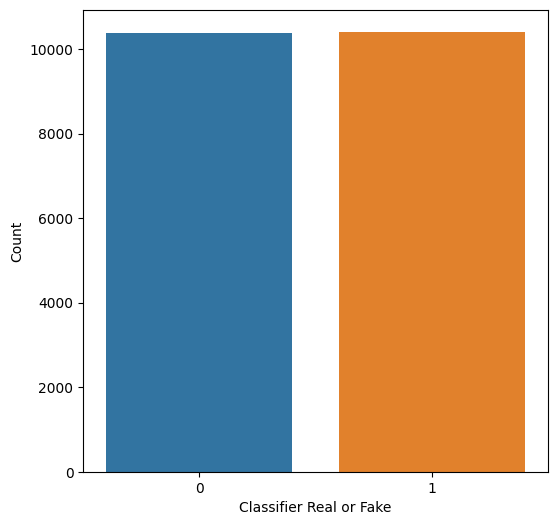

In [38]:
# Visualizing the count of 'Label' column from the dataset

plt.figure(figsize=(6,6))
sns.countplot(x='label', data=news_dataset)
plt.xlabel('Classifier Real or Fake')
plt.ylabel('Count')
plt.show()

In [ ]:
# In fact, we're not going to predict based on the content of the news because that would be time consuming since some paragraphs are too long and the dataset is too large
# a better alternative would be to predict based on the title and the author
# Thus we will merge the two columns
news_dataset['content'] = news_dataset['author'] + ' ' + news_dataset['title'] + ' ' + news_dataset['title']
news_dataset['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799    David Swanson What Keeps the F-35 Alive What K...
Name: content, Length: 20800, dtype: object

In [ ]:
# Now the stemming process (reducing a word to its root)
port_stem = PorterStemmer()

def stemming(content): # remember that content is the column that we'll be using for prediction
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) # search for only alphabets (skip numbers and so on and replace them by a space) 
    stemmed_content = stemmed_content.lower() # this is to convert the words into lowercase to avoid problems in processing the model
    stemmed_content = stemmed_content.split() # this for splitting and converting into a list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # take all the words that are not stopwords and perfonm the function on them
    stemmed_content = ' '.join(stemmed_content) # join them again
    return stemmed_content

In [ ]:
# Now we apply the previous function on the content column
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
news_dataset['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2        consortiumnew com truth might get fire truth m...
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                david swanson keep f aliv keep f aliv
Name: content, Length: 20800, dtype: object

In [ ]:
# Separate data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values
print(X)
print(Y)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan nato russia hold parallel exercis balkan'
 'david swanson keep f aliv keep f aliv']
[1 0 1 ... 0 1 1]


In [ ]:
# Now we convert the textual data into numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
X

<20800x17128 sparse matrix of type '<class 'numpy.float64'>'
	with 210687 stored elements in Compressed Sparse Row format>

In [ ]:
# Now we feed this data to our model
# splitting the dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

TRAIN THE MODEL USING LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression()

model.fit(X_train, Y_train)

LogisticRegression()

EVALUATE THE MODEL

In [ ]:
# Accuracy score on the training data
# Logically we'll get a good accuracy since it was trained on this training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy score of the training data: ",training_data_accuracy)

Accuracy score of the training data:  0.9675480769230769


In [ ]:
# However the most important is the accuracy score of the test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy score of the testing data: ",testing_data_accuracy) 

Accuracy score of the testing data:  0.9557692307692308


In [40]:
# the confusion matrix
confusion_mat = confusion_matrix(Y_test, X_test_prediction)
confusion_mat


array([[1910,  167],
       [  17, 2066]], dtype=int64)

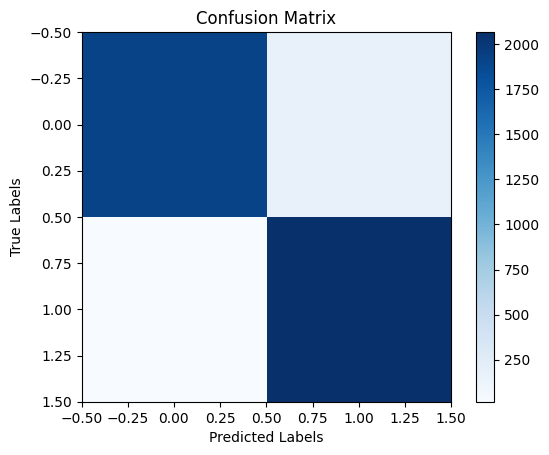

In [41]:
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()